In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.metrics import r2_score as R2S

## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-08-14


'2023-08-14'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
EBconc = '[EB] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [4]:
Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']

category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [5]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Join Data ##

In [27]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [14]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-14.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-22.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-20.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-21.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-29.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-12.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-17.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-19.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-25.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-27.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-10

In [15]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = data.append(d, ignore_index=True)
data[Type].unique()

array(['R102S', 'R303X', 'None', 'WT', 'P191R', 'Y64N', 'R178L', 'G223E',
       'R76S'], dtype=object)

In [16]:

data[Type] = data[Type].astype(category_Type)
data = data.sort_values(by=[Type, DCXconc])
#FIX CONCENTRATION
data[DCXconc] = data[DCXconc].apply(lambda x: round(x*2.27))
np.sort(data[DCXconc].unique())

array([  0,  32,  57,  79, 114, 227], dtype=int64)

In [17]:
data

,Date,Investigator,CH,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
601,2020-07-03,Sofia,13,12.0,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
602,2020-07-03,Sofia,13,12.0,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
603,2020-07-03,Sofia,13,12.0,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
604,2020-07-03,Sofia,13,12.0,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
605,2020-07-03,Sofia,13,12.0,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,2021-01-29,Sofia,22,6.0,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
8940,2021-01-29,Sofia,22,6.0,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
8941,2021-01-29,Sofia,22,6.0,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
8942,2021-01-29,Sofia,22,6.0,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [18]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open data if already saved ##

In [6]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data 

,Date,Investigator,CH,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
0,2020-07-03,Sofia,13,12.0,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
1,2020-07-03,Sofia,13,12.0,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
2,2020-07-03,Sofia,13,12.0,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
3,2020-07-03,Sofia,13,12.0,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
4,2020-07-03,Sofia,13,12.0,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,2021-01-29,Sofia,22,6.0,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
11304,2021-01-29,Sofia,22,6.0,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
11305,2021-01-29,Sofia,22,6.0,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
11306,2021-01-29,Sofia,22,6.0,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [7]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('D:/Sofia/Data_Sheets_summer/Plots')

In [8]:
data = data.dropna()

## Seaborn plot #

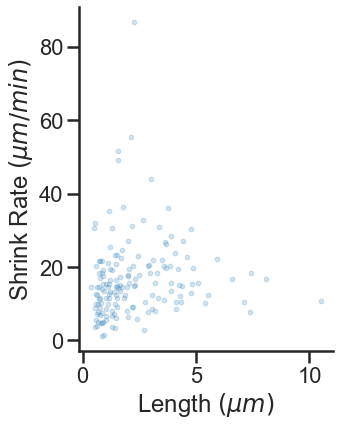

In [98]:
y=ShrinkageRate
x=Length
sns.lmplot(x=x, y=y, truncate=True, scatter_kws={"s": 22,"alpha":0.2},
                aspect=0.8, height=6, data=data[(data[Type]=='R102S')&(data[DCXconc]==32)],
           fit_reg=False, markers='o', hue= DCXconc, x_jitter=.2,legend=False)
sns.despine(left=False)
sns.set_style("whitegrid")
sns.set_style("ticks")
#plt.ylim(0,1)

# ax.xaxis.set_tick_params(width=2.5,size=10)
# ax.yaxis.set_tick_params(width=2.5,size=10)
# ax.legend.remove()
# pt.savefig(savedir/(date+'-Rescue-AllData-GrowthvsShrinkLength-Plot-DepolToSeed-Corrected.pdf'))
# pt.savefig(savedir/(date+'-Rescue-AllData-GrowthvsShrinkLength-Plot-DepolToSeed-Corrected.svg'))


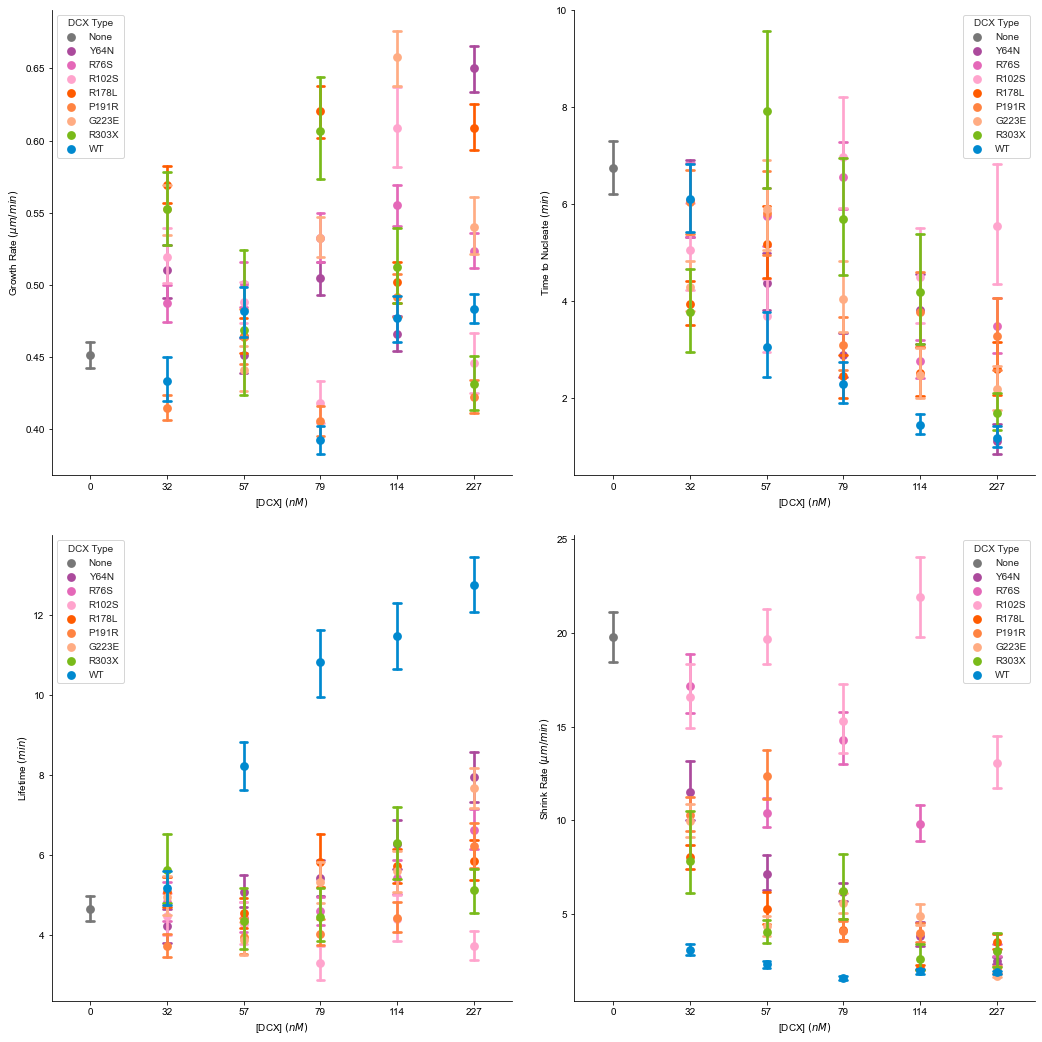

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=DCXconc, y=parameters[c],
                        hue=Type, err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==6)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.pdf'))
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.png'))

# Fitting Data #

In [9]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [10]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    
    maxbin = selectdata[parameter].max()
    
    if np.isnan(maxbin) == True:
        return [np.nan],[np.nan]
    
    elif parameter == GrowthRate :
        binsize = 0.05
    elif parameter == ShrinkageRate :
        binsize = 0.5
    else:
        binsize = 1

    binarange = np.arange(0, maxbin + binsize, binsize)
    
    n, bins, patches = plt.hist(selectdata[parameter], bins=binarange, density=True);
    plt.clf()
       
    return n, bins

In [11]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():

                    n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc)      

                    if np.isnan(np.sum(n)) == True:
                        continue

                    if equation == gamma :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                    else :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                    variance = np.diagonal(var_matrix) #Refer [3]
                    SE = np.sqrt(variance) #Refer [4]

                #======Making a data frame========
                    results0 = pd.DataFrame(columns=[] , index=[])
                    
                    for k in np.arange(0,len(coeff)):
                        
                        r0 = pd.DataFrame([[coeff[k],SE[k]],],columns=['Fit', 'SE'])
                        r0['Coefficient'] = k
                        results0 = pd.concat([results0, r0], sort=False)
                        
#                     for k in np.arange(0,len(coeff)):
#                         header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
#                         r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
#                         results0 = pd.concat([results0, r0], axis=1, sort=False)

                    results0[tubulin] = tubconc
                    results0[Type] = dcxtype
                    results0[DCXconc] = dcxconc
                    results0['Parameter'] = parameter

                    results = pd.concat([results, results0], sort=False)

    return results

In [12]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/Data_Sheets_summer/Plots/2023-08-14_fitdata')

In [13]:
GrowthRateFit = equation_fit(data, GrowthRate);

<Figure size 432x288 with 0 Axes>

In [ ]:
TimeToNucleateFit = equation_fit(data, TimeToNucleate);

In [ ]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


In [ ]:
GrowthRateFit['Moment'] = GrowthRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')
TimeToNucleateFit['Moment'] = 'Mean'
ShrinkageRateFit['Moment'] = ShrinkageRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')

In [ ]:
GrowthRateFit

In [ ]:
LifetimeCoeff0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['Fit'].values
LifetimeCoeff1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['Fit'].values
LifetimeSE0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['SE'].values
LifetimeSE1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = np.sqrt(np.square(LifetimeCoeff0*LifetimeSE1) + np.square(LifetimeCoeff1*LifetimeSE0))
LifetimeSE

In [ ]:
LTmeandf = LifetimeFit[(LifetimeFit['Coefficient']==0)]
LTmeandf['Fit'] = LifetimeMean
LTmeandf['SE'] = LifetimeSE
LTmeandf['Coefficient'] = np.NaN
LTmeandf['Moment'] = 'Mean'
LTmeandf

In [ ]:
ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LTmeandf,ShrinkageRateFit], axis=0, sort=False)
ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

#  Open saved fit parameters  #

In [9]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
ResultFit = pd.read_csv(askFitParam, encoding='utf-8')
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,Parameter,Moment
0,1.070577,0.008903,0.0,12.0,None,0,Growth Rate $(\mu m / min)$,Mean
1,0.157043,0.007290,1.0,12.0,None,0,Growth Rate $(\mu m / min)$,Std
2,0.797346,0.025314,0.0,8.0,None,0,Growth Rate $(\mu m / min)$,Mean
3,0.149149,0.020669,1.0,8.0,None,0,Growth Rate $(\mu m / min)$,Std
4,0.416686,0.002427,0.0,6.0,None,0,Growth Rate $(\mu m / min)$,Mean
...,...,...,...,...,...,...,...,...
363,5.080860,0.468668,1.0,14.0,None,0,Shrink Rate $(\mu m / min)$,Std
364,19.051355,0.549069,0.0,10.0,None,0,Shrink Rate $(\mu m / min)$,Mean
365,5.591572,0.456008,1.0,10.0,None,0,Shrink Rate $(\mu m / min)$,Std
366,12.426828,0.919834,0.0,7.0,None,0,Shrink Rate $(\mu m / min)$,Mean


In [10]:
newmydir = Path(askFitParam).parent

## dcx EQ FIT ##

In [34]:
def pickdata(dcxtype, parameterNo):
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')& (ResultFit[tubulin]==6)]

    parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[parameterNo]]

    x = parameterMeanDF[DCXconc].values
    y = parameterMeanDF['Fit'].values
    yerr = parameterMeanDF['SE'].values
    
    return x,y,yerr

growth rate

In [35]:
x,y,yerr = pickdata('P191R', 0)
x0,y0,yerr0 = pickdata('None', 0)

X = [*x0,*x]
Y = [*y0,*y]

p, cov = np.polyfit(X,Y, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mG,bG=p
p, SElin

(array([-4.37247026e-05,  4.08699967e-01]), array([0.00019631, 0.02195383]))

In [36]:
y.mean(),y.std(),y0

(0.40265154787247714, 0.031009101082281797, array([0.41668619]))

In [37]:
p*1000*27 , SElin*1000*27

(array([-1.18056697e+00,  1.10348991e+04]),
 array([  5.30037064, 592.75350819]))

In [38]:
R2S(Y,np.multiply(X,mG)+bG)

0.012250549908347175

shrink rate

In [39]:
x,y,yerr = pickdata('WT', 3)
x0,y0,yerr0 = pickdata('None', 3)

X = [*x0,*x]
YS = [*y0,*y]

# p, cov = np.polyfit(X,Y, 1, cov=True)
# var = np.diagonal(cov) #Refer [3]
# SElin = np.sqrt(var) #Refer [4]
# mS,bS=p
# p, SElin

In [40]:
def exponential_general(x,a,b,c):
    return(a * np.exp(-x/b) ) +c

In [41]:
coeff, var_matrix = sp.optimize.curve_fit(exponential_general,X,YS,[2,2,2])

variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance)
coeff,SE

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([12.37233859,  1.15010036,  1.31617109]), array([inf, inf, inf]))

In [42]:
C1S, C2S, C3S = coeff

In [43]:
p*1000*27 , SElin*1000*27

(array([-1.18056697e+00,  1.10348991e+04]),
 array([  5.30037064, 592.75350819]))

In [44]:
R2S(Y,np.multiply(X,mS)+bS)

NameError: name 'mS' is not defined

time to nuc

In [45]:
x,y,yerr = pickdata('WT', 1)
x0,y0,yerr0 = pickdata('None', 1)

X = [*x0,*x]
YN = [*y0,*y]

In [46]:
def exponential_general(x,a,b,c):
    return(a * np.exp(-x/b) ) + c

In [47]:
coeff, var_matrix = sp.optimize.curve_fit(exponential_general,X,YN,[2,2,2])

variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance)
coeff,SE

(array([ 6.55798027, 56.87540258,  0.97497863]),
 array([ 1.76730097, 35.1145516 ,  1.44045699]))

In [48]:
C1T, C2T, C3T= coeff

In [49]:
X = np.array(X)
R2S(YN,exponential_general(X,C1T, C2T, C3T))

0.8394323697456567

In [50]:
x,y,yerr = pickdata('R76S', 1)
YN = [*y0,*y]
coeff, var_matrix = sp.optimize.curve_fit(exponential_general,X,YN,[2,2,2])

variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance)
C1T76, C2T76, C3T76= coeff

x,y,yerr = pickdata('P191R', 1)
YN = [*y0,*y]
coeff, var_matrix = sp.optimize.curve_fit(exponential_general,X,YN,[2,2,2])

variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance)
C1T191, C2T191, C3T191= coeff

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


lifetime

In [51]:
x,y,yerr = pickdata('WT', 2)
x0,y0,yerr0 = pickdata('None', 2)

X = [*x0,*x]
YL = [*y0,*y]
YerrL = [*yerr0,*yerr]

In [52]:
def hillEQ(x, n, kd):
    return  (YL[-1]- YL[0]) * np.power(x, n)/(kd + np.power(x, n)) + YL[0]

In [53]:
#x,y = pickdata('WT', 2)

coeff, var_matrix = sp.optimize.curve_fit(hillEQ,X,YL)

variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance)
coeff,SE

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(array([3.69448044e+00, 2.76678193e+06]),
 array([4.95909593e-01, 5.63447918e+06]))

In [54]:
C1L, C2L = coeff

In [55]:
X = np.array(X)
R2S(YL,hillEQ(X,C1L, C2L))

0.9910135657502569

In [56]:
np.power(coeff[1], (1/coeff[0]))

55.421142646063146

In [57]:
logx = np.log(X[1:-1])
normy =( YL[1:-1]-YL[0])/(YL[-1]-YL[0])
logy = np.log(normy/(1-normy))

p, cov = np.polyfit(logx, logy, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

m,b = p


normyerr = ( YerrL[1:-1]-YerrL[0])/(YerrL[-1]-YerrL[0])
logyerr = np.power(1/(1-normy),2)*normyerr

p, SElin

(array([  3.24769793, -13.0913579 ]), array([0.5427463 , 2.26854382]))

In [58]:
1/((1-normy)**2)*normyerr

array([ 0.15084598,  1.74739586, 42.76275391, 46.84587658])

In [59]:
np.exp(-b), np.exp(-b)*SElin[1]

(484735.1292419978, 1099642.8803093133)

In [60]:
R2S(logy,logx*m+b)

0.947098541668598

mutant fit of lifetime

In [61]:
x,y,yerr = pickdata('R76S', 2)
x0,y0,yerr0 = pickdata('None', 2)

X = np.array(x)
YL76 = np.array(y)


p, cov = np.polyfit(X,YL76, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mL76,bL76=p
R276 = R2S(YL76,X*mL76+bL76)

x,y,yerr = pickdata('P191R', 2)

YL191 = np.array(y)

p, cov = np.polyfit(X,YL191, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mL191,bL191=p
R2191 = R2S(YL191,X*mL191+bL191)

R276,R2191

(0.9731514846642703, 0.9765676199318853)

## PLOT##

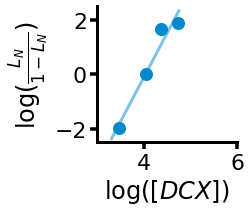

In [62]:
scattersize = 9
cap = 5

fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
ax.errorbar(logx , logy , yerr= 0 , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,color=cyan, alpha = 1, ls='')

x0 = np.arange(3.3, 4.8, 0.05)
ax.plot(x0, x0*m+b,color = cyan, lw=3,ls= '-',alpha = 0.5)

ax.set_ylim(-2.5,2.5)
ax.set_xlim(3,6)
ax.set_xlabel(r'$\log([DCX])$')
#ax.set_xticks(np.arange(0, 22.1, 2))
#ax.set_yticks(np.arange(0, 150.1, 25))
ax.set_ylabel(r'$\log(\frac{L_N}{1-L_N})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.94 \pm 0.49$' '\n' r'$R^2 > 0.945$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(newmydir/('logexpHillfit_Lifetime_'+date+'.svg'))

#  PLOT DATA  #

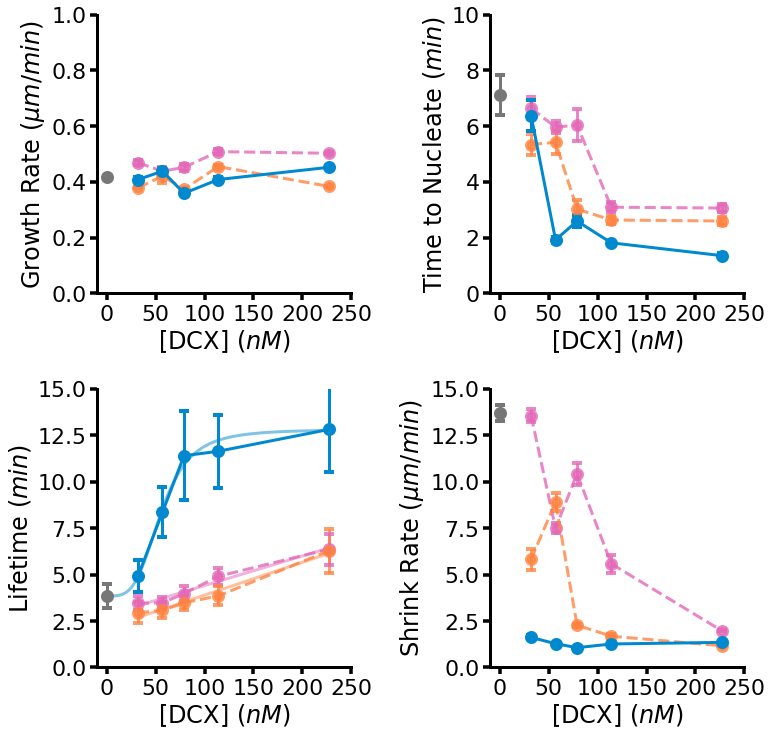

In [129]:
scattersize = 9
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shrinkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(11.25,10.75))

linx = np.arange(0, 230, 1)
#ax[0][0].plot(linx, linx*mG+bG,color = cyan, lw=3,ls= '-',alpha = 0.5)

# ax[0][1].plot(linx, exponential_general(linx,C1T,C2T,C3T),color = cyan, lw=3,ls= '-',alpha = 0.5)
# ax[0][1].plot(linx, exponential_general(linx,C1T76,C2T76,C3T76),color = '#e468b8', lw=3,ls= '-',alpha = 0.5)
# ax[0][1].plot(linx, exponential_general(linx,C1T191,C2T191,C3T191),color = '#ff8341', lw=3,ls= '-',alpha = 0.5)

ax[1][0].plot(linx, hillEQ(linx,C1L, C2L),color = cyan, lw=3,ls= '-',alpha = 0.5)
linx = np.arange(35, 230, 1)
ax[1][0].plot(linx, linx*mL76+bL76 ,color = '#e468b8', lw=3,ls= '-',alpha = 0.5)
ax[1][0].plot(linx, linx*mL191+bL191 ,color = '#ff8341', lw=3,ls= '-',alpha = 0.5)


count = 0

palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]

for dcxtype in ['None','R76S','P191R','WT']: #data[Type].unique(): #['None','R76S','P191R','WT']
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')& (ResultFit[tubulin]==6)]
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[DCXconc].values
            y = parameterMeanDF['Fit'].values
            yerr = parameterMeanDF['SE'].values
            
            if dcxtype == 'None' or  dcxtype == 'WT':

                ax[i][j].errorbar(x , y , yerr= yerr , fmt='-',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
            else:
                ax[i][j].errorbar(x , y , yerr= yerr , fmt='--',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)

            c += 1

    count += 1

ax[0][0].set_ylim(0,1)
ax[1][0].set_ylim(0,15)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,15)


# linx = np.arange(30, 230, 1)
# ax[1][1].plot(linx, linx*mS+bS,color = cyan, lw=3,ls= '-',alpha = 0.5)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-10,250)
        ax[i][j].set_xlabel(DCXconc)
        ax[i][j].set_xticks(np.arange(0, 251, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

#ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

plt.savefig(newmydir/('dynamics_WT-2mutants'+date+'.svg'))

# Histogram #

In [26]:
def plot_hist(data, tubconc, dcxtype, dcxconc,color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    fig, ax = plt.subplots(2,2,figsize=(11.2,11))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.05
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 1

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,histtype='stepfilled',color = color,alpha = 0.4);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability Density')
            ax[i][j].set_xlim(0,maxbin)
            ax[0][0].set_xticks(np.arange(0, 1.6, 0.5))
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit.dropna(subset=['Coefficient'])
    selectcoeff=selectcoeff[(selectcoeff[tubulin]==tubconc) & (selectcoeff[Type]==dcxtype) 
                            & (selectcoeff[DCXconc]==dcxconc)]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[1]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(dcxconc)+' nM'
    #ax[0][1].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    #ax[1][0].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    
    ax[0][0].set_ylim(0,6)
    ax[1][0].set_ylim(0,0.25)
    ax[0][1].set_ylim(0,0.6)
    ax[1][1].set_ylim(0,0.6)
    
    sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
    plt.tight_layout()
    
    plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'-'+str(dcxconc)+'-'+date+'.svg'))
    
    return print(n)

In [27]:
newmydir

WindowsPath('D:/Sofia/Data_Sheets_summer/Plots/2023-08-08_fitdata')

In [28]:
grey00 = '#777777'
grey20 = '#C5C5C5'
cyan00 = '#0089CF'  
cyan20 = '#65CBFF'
pink00 = '#e468b8'
pink20 = '#FBB0E1'
orange00 = '#ff8341'
orange20 = '#FFC6A8'

553


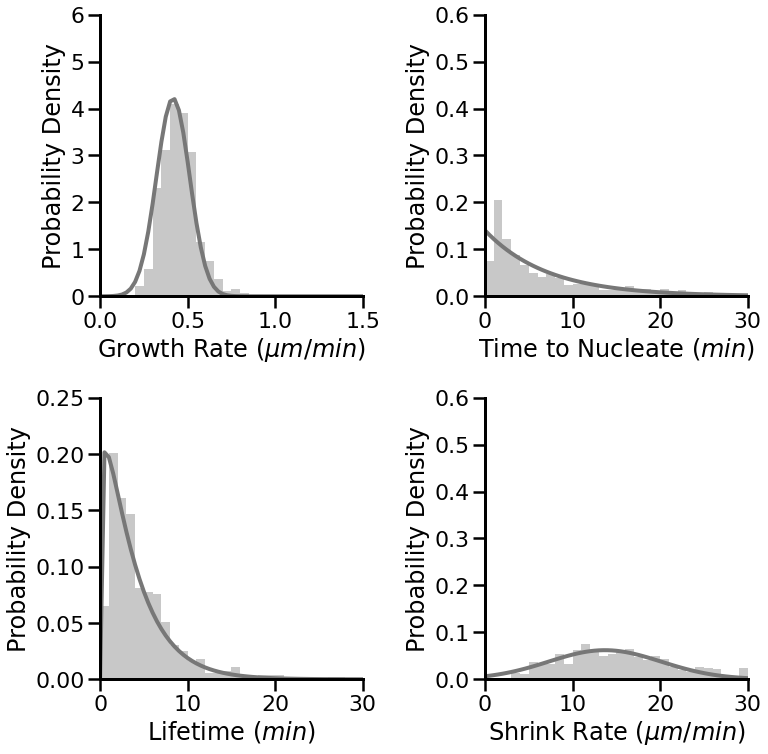

In [29]:
plot_hist(data, 6, 'None',0, grey00) #32,57,79,114,227 '#ff8341' orange ,'#e468b8' pink

223


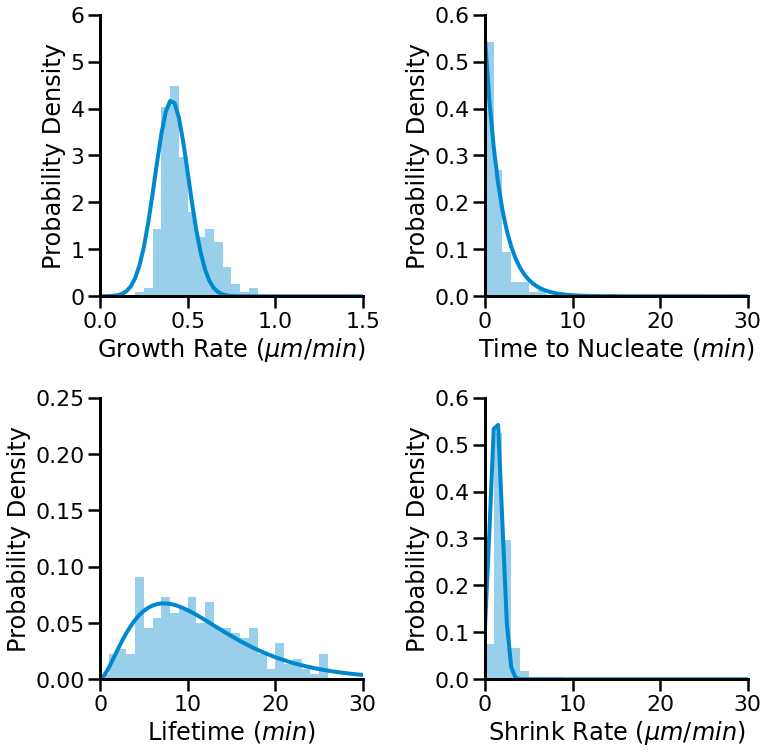

In [30]:
plot_hist(data, 6, 'WT', 114,cyan) 

295


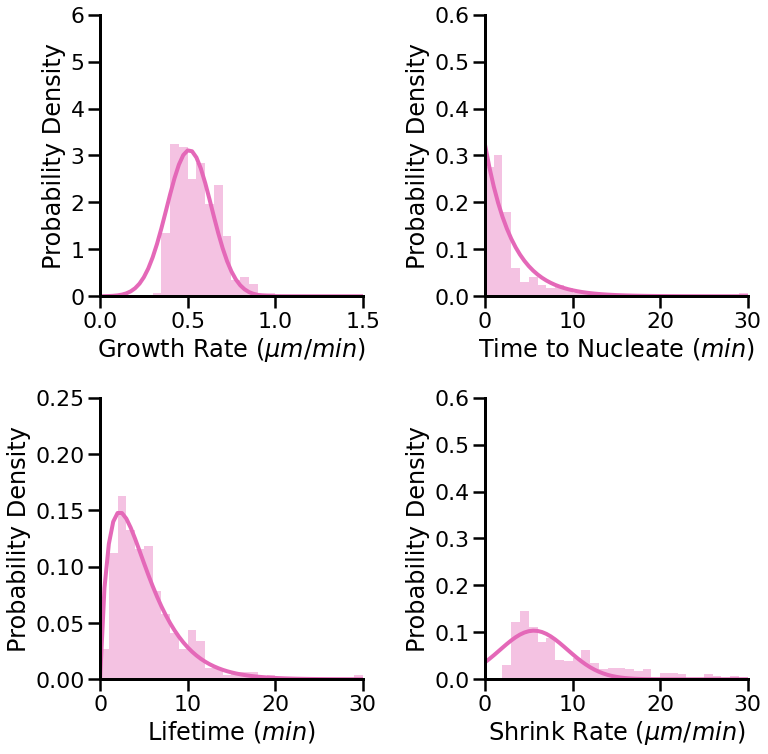

In [31]:
plot_hist(data, 6, 'R76S', 114,pink00)  #32,57,79,114

208


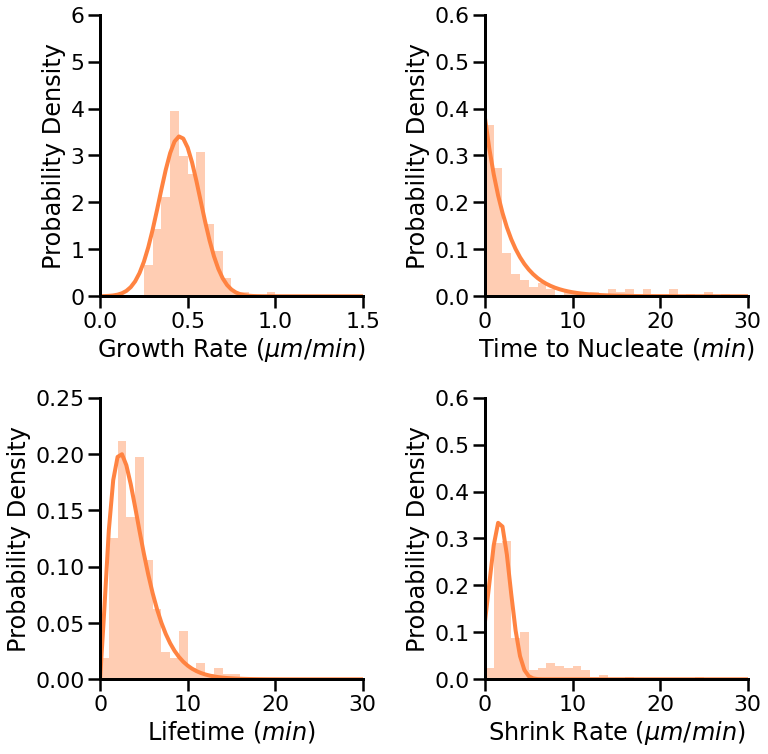

In [32]:
plot_hist(data, 6, 'P191R', 114,orange00) 

## Population tests ##

In [669]:
def stats_hist(data, tubconc, dcxtype, dcxconc, parameter) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    return selectdata[parameter]

In [670]:
x1 = stats_hist(data, 6, 'None', 0, GrowthRate)
x2 = stats_hist(data, 6, 'WT', 114, GrowthRate)
x3 = stats_hist(data, 6, 'R76S', 114, GrowthRate)
x4 = stats_hist(data, 6, 'P191R', 114, GrowthRate)
ztest(x1, x2, value=0)

(-3.002846917460517, 0.002674669337331631)

In [673]:
ztest(x1, x4, value=0)

(-4.670720250848675, 3.00145467205431e-06)

In [841]:
x3 = stats_hist(data, 6, 'R76S', 114, ShrinkageRate)
x4 = stats_hist(data, 6, 'P191R', 114, ShrinkageRate)
sp.stats.mannwhitneyu(x3,x4)

MannwhitneyuResult(statistic=9562.0, pvalue=8.007048878058066e-40)

## Reproducibility ##

In [137]:
tubconc = 6
dcxtype = 'None'
dcxconc = 0
selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]

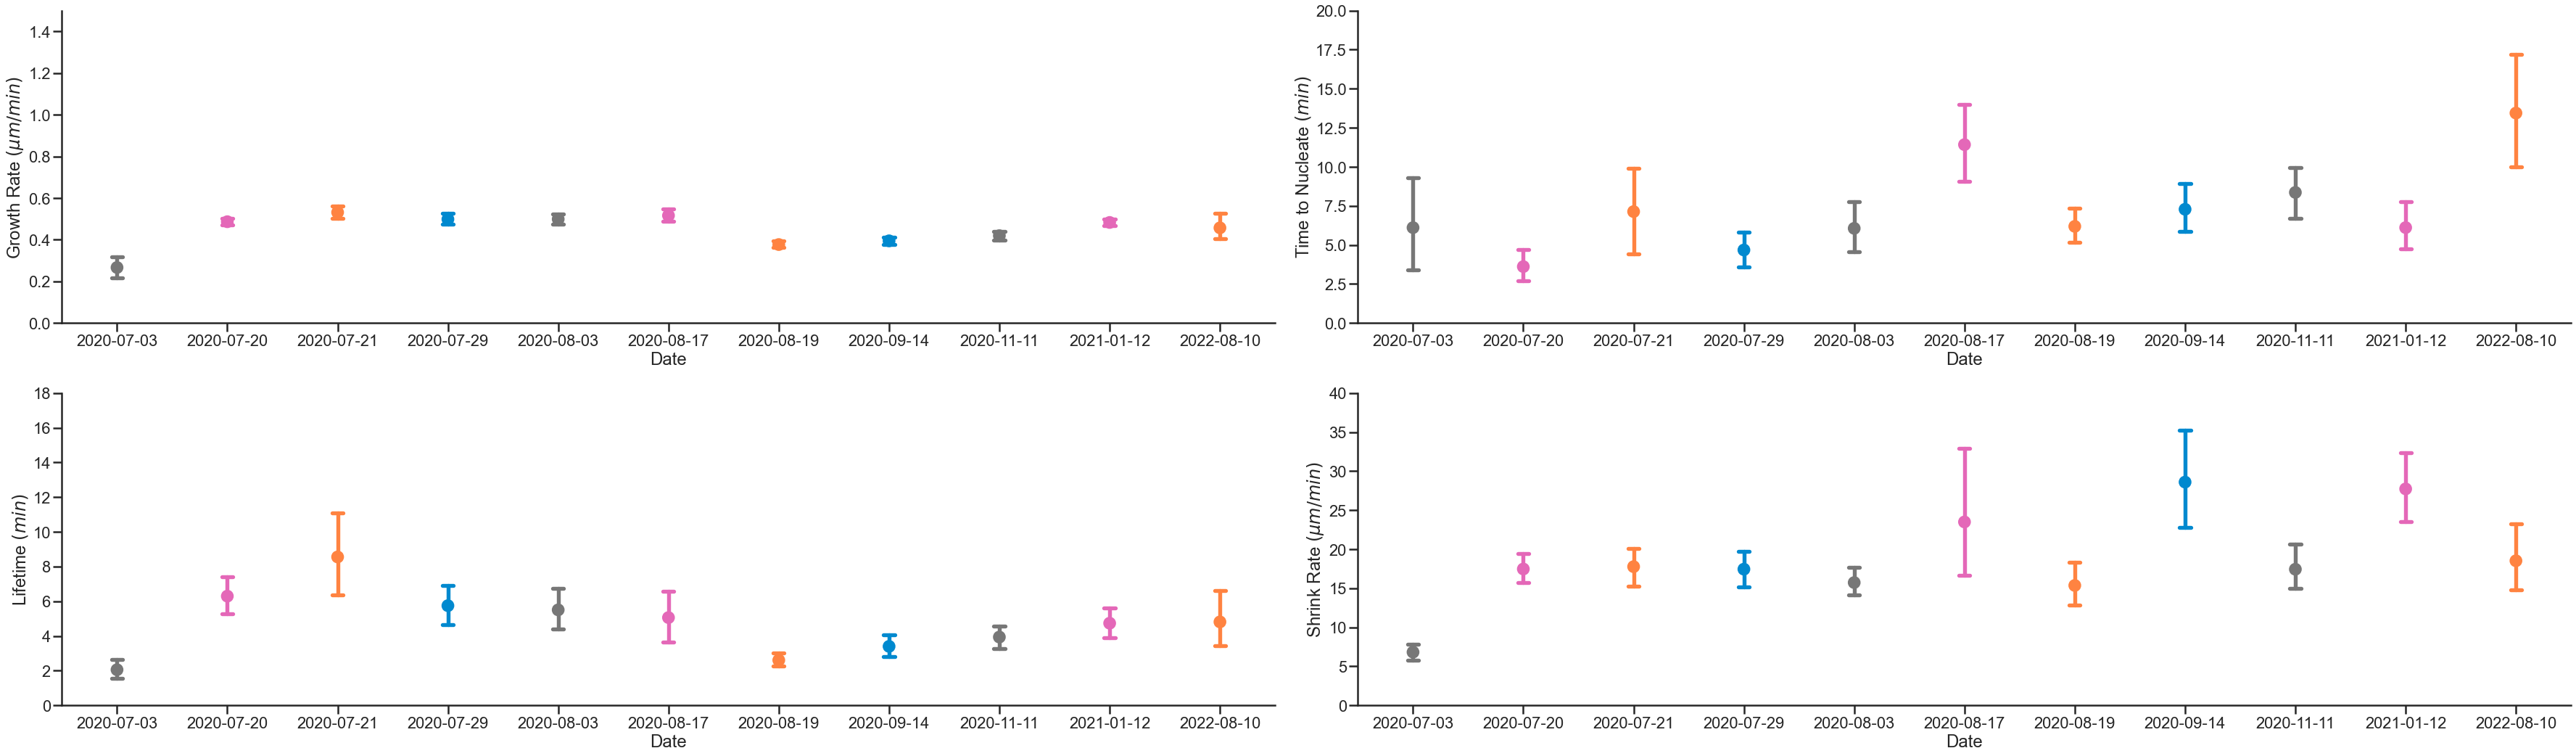

In [143]:
fig, axs = plt.subplots(2,2,figsize=(50,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                         err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
axs[0][0].set_ylim(0,1.5)
axs[1][0].set_ylim(0,18)
axs[0][1].set_ylim(0,20)
axs[1][1].set_ylim(0,40)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


# Rescues #

In [75]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():

                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
                    n =  selectdata[Type].count()

                    if n == 0:
                        continue
                        
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]
                

                #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], 'Normalized Rescue': [rescue_values],
                         'n': [n]}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

    return results

In [76]:
rescues = rescue_count(data)
rescues

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,Normalized Rescue,n
0,12.0,None,0,0.047619,105
0,8.0,None,0,0.034483,29
0,6.0,None,0,0.010850,553
0,6.0,Y64N,32,0.000000,206
0,6.0,Y64N,57,0.034615,260
0,6.0,Y64N,79,0.075163,306
0,6.0,Y64N,114,0.247826,230
0,6.0,Y64N,227,0.868932,206
0,6.0,R76S,32,0.004444,225
0,6.0,R76S,57,0.006410,312


In [116]:
x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'WT')][DCXconc]
y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'WT')]['Normalized Rescue']
x0 = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'None')][DCXconc]
y0 = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'None')]['Normalized Rescue']
X = [*x0,*x]
YR = [*y0,*y]

def hillEQ2(x, n, kd):
    return np.power(x, n)/(kd + np.power(x, n)) 

coeff, var_matrix = sp.optimize.curve_fit(hillEQ2,X,YR)

variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance)

C1R,C2R = coeff
coeff,SE

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


(array([3.20310482e+00, 6.50249250e+05]),
 array([3.79720167e-01, 1.04533658e+06]))

In [117]:
np.power(coeff[1], (1/coeff[0]))

65.2869842817794

In [118]:
hillEQ(X,C1R, C2R)

array([ 3.84602165,  4.67440776,  7.36701485,  9.65276905, 11.51878417,
       12.64320916])

In [119]:
X = np.array(X)
R2S(YR,hillEQ2(X,C1R, C2R))

0.9912370360737193

In [121]:
x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'P191R')][DCXconc]
y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'P191R')]['Normalized Rescue']

XR191 = np.array(x[1:])
YR191 = np.array(y[1:])


p, cov = np.polyfit(XR191,YR191, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mR191,bR191=p
R2R191 = R2S(YR191,XR191*mR191+bR191)
R2R191

0.9834586149261352

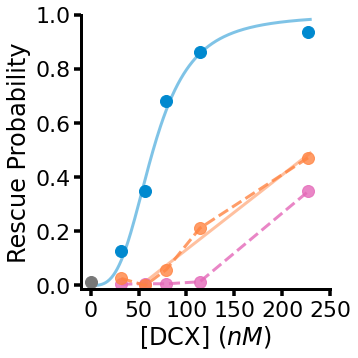

In [122]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))
#     plt.suptitle('Fitted pooled data', fontsize=30)

linx = np.arange(0, 230, 1)
ax.plot(linx, hillEQ2(linx,C1R, C2R),color = cyan, lw=3,ls= '-',alpha = 0.5)    

count = 0
palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]

linx = np.arange(55, 230, 1)
ax.plot(linx, linx*mR191+bR191 ,color = '#ff8341', lw=3,ls= '-',alpha = 0.5)

for dcxtype in ['None','R76S','P191R','WT']: #data[Type].unique(): #['None','R76S','P191R','WT']

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,'s',color=palette[count],marker = 'o', ms=scattersize,)
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=scattersize, ls='--',alpha=0.8)

    count += 1



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-10,250)
ax.set_xticks(np.arange(0, 251, 50))
ax.set_xlabel(DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_WT-2mutants'+date+'.svg'))

In [123]:
X

array([  0,  32,  57,  79, 114, 227])

In [124]:
YR = np.array(YR)

In [125]:
logx = np.log(X[1:])
normy =YR[1:]
logy = np.log(normy/(1-normy))

p, cov = np.polyfit(logx, logy, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

m,b = p

p, SElin

(array([  2.45928531, -10.29485005]), array([0.29017824, 1.29324029]))

In [126]:
R2S(logy,logx*m+b)

0.9599075562335437

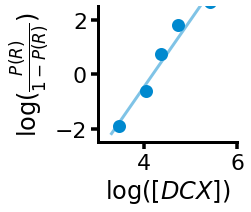

In [127]:
scattersize = 9
cap = 5
fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
ax.errorbar(logx , logy , yerr= 0 , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,color=cyan, alpha = 1, ls='')

x0 = np.arange(3.3, 5.4, 0.05)
ax.plot(x0, x0*m+b,color = cyan, lw=3,ls= '-',alpha = 0.5)

ax.set_ylim(-2.5,2.5)
ax.set_xlim(3,6)
ax.set_xlabel(r'$\log([DCX])$')
#ax.set_xticks(np.arange(0, 22.1, 2))
#ax.set_yticks(np.arange(0, 150.1, 25))
ax.set_ylabel(r'$\log(\frac{P(R)}{1-P(R)})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.46 \pm 0.29$' '\n' r'$R^2 > 0.959$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(newmydir/('logexpHillfit_Rescues_'+date+'.svg'))

# Lifetime Parameters #

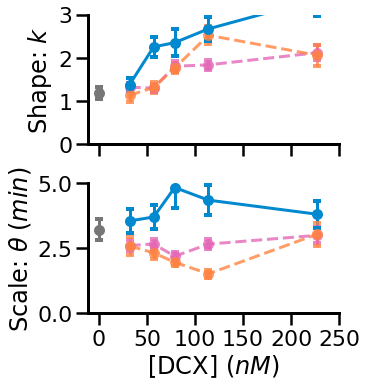

In [128]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 7
cap = 4

fig, ax = plt.subplots(2,1,figsize=(4.5,5.5),sharex=True)
fig.subplots_adjust(hspace=0.3)
#     plt.suptitle('Fitted pooled data', fontsize=30)
selectcoeff = ResultFit.dropna(subset=['Coefficient'])

count = 0

palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan]
#[grey,cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]

for dcxtype in ['None','R76S','P191R','WT']: #data[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Parameter']==Lifetime)
                           & (ResultFit[tubulin]==6)].dropna(subset=['Coefficient'])

    x = dcxtype_DF[(dcxtype_DF['Coefficient']==0)][DCXconc].values
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['SE'].values

    if dcxtype == 'None' or  dcxtype == 'WT':

        ax[0].errorbar(x , y , yerr= yerr , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
    else:
        ax[0].errorbar(x , y , yerr= yerr , fmt='--',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['SE'].values

    if dcxtype == 'None' or  dcxtype == 'WT':

        ax[1].errorbar(x , y , yerr= yerr , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
    else:
        ax[1].errorbar(x , y , yerr= yerr , fmt='--',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)
    
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    
    
    ax[i].set_xticks(np.arange(0, 251, 50))
    

ax[0].set_ylim(0,3)    
ax[0].set_yticks(np.arange(0, 3.1, 1))

ax[1].set_ylim(0,5)    
ax[1].set_yticks(np.arange(0, 5.1, 2.5))


ax[1].set_xlabel( DCXconc)
ax[0].set_ylabel( 'Shape: ' r'$k$')

ax[1].set_ylabel( 'Scale: ' r'$\theta \; (min)$')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
#plt.tight_layout()
#ax[0].legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms_WT-2mutants.svg'))

In [643]:
[grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan]

['#777777', '#e468b8', '#ff8341', '#0089CF']

In [658]:
newmydir

WindowsPath('D:/Sofia/Data_Sheets_summer/Plots/2023-02-21_fitdata')